In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [2]:
purchase_price = pd.read_csv('2017PurchasePricesDec.csv')
begInv = pd.read_csv('BegInvFINAL12312016.csv') 
endInv = pd.read_csv('EndInvFINAL12312016.csv') 
Invoice = pd.read_csv('InvoicePurchases12312016.csv') 
final_purchase= pd.read_csv('PurchasesFINAL12312016.csv') 
final_sales = pd.read_csv('SalesFINAL12312016.csv') 

In [3]:
purchase_price.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [4]:
purchase_price.shape

(12261, 9)

In [5]:
purchase_price.isnull().sum()

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [6]:
purchase_price.dropna(inplace=True)

In [7]:
purchase_price.isnull().sum()

Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

purchase_price.info()

In [8]:
purchase_price['Volume'] = pd.to_numeric(purchase_price['Volume'].str.replace(',', '', regex=True), errors='coerce')

In [9]:
purchase_price.dtypes

Brand               int64
Description        object
Price             float64
Size               object
Volume            float64
Classification      int64
PurchasePrice     float64
VendorNumber        int64
VendorName         object
dtype: object

In [10]:
purchase_price.duplicated().sum()

np.int64(0)

EDA

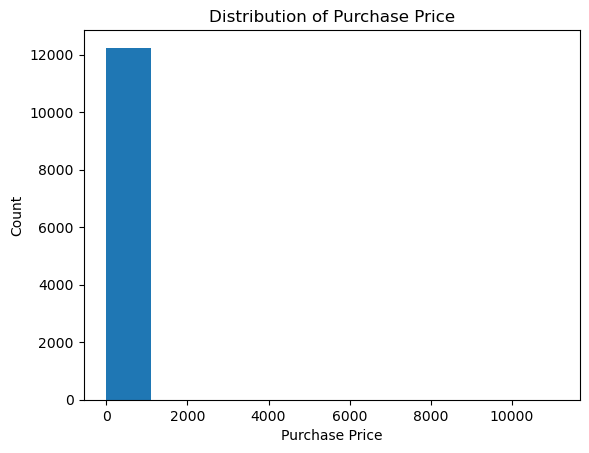

In [11]:
# What is the distribution of Purchase Price?
plt.hist(purchase_price['PurchasePrice'])
plt.title("Distribution of Purchase Price")
plt.xlabel("Purchase Price")
plt.ylabel("Count")
plt.show()

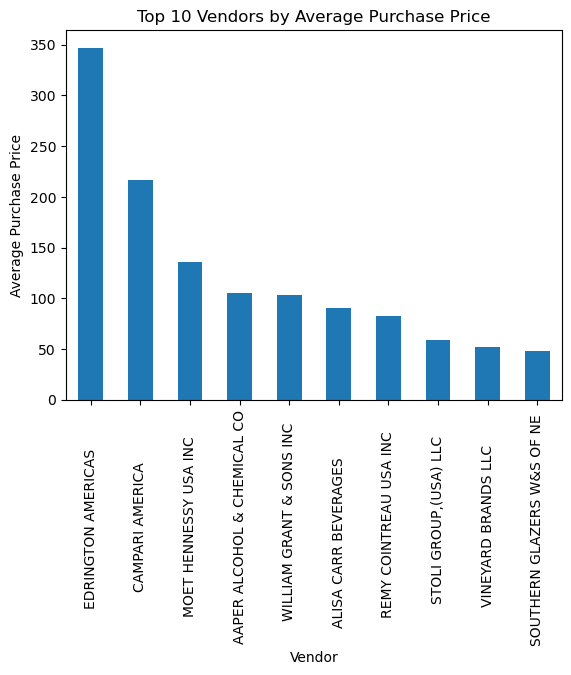

In [12]:
# Who are the top 10 vendors by average purchase price?
purchase_price.groupby('VendorName')['PurchasePrice'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Vendors by Average Purchase Price")
plt.xlabel("Vendor")
plt.ylabel("Average Purchase Price")
plt.show()

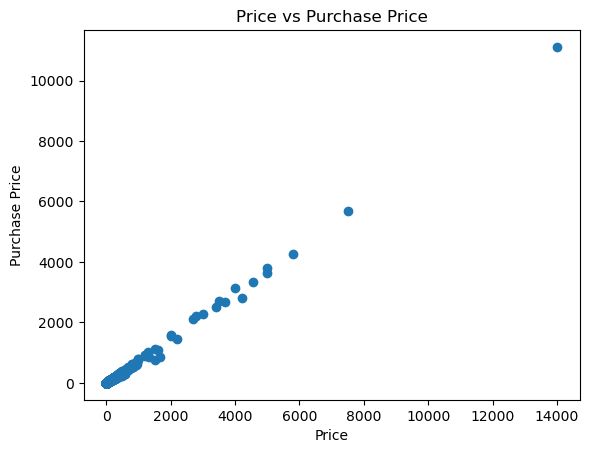

In [13]:
# What is the relationship between Selling Price and Purchase Price?
plt.scatter(purchase_price['Price'] , purchase_price['PurchasePrice'])
plt.title("Price vs Purchase Price")
plt.xlabel("Price")
plt.ylabel("Purchase Price")
plt.show()

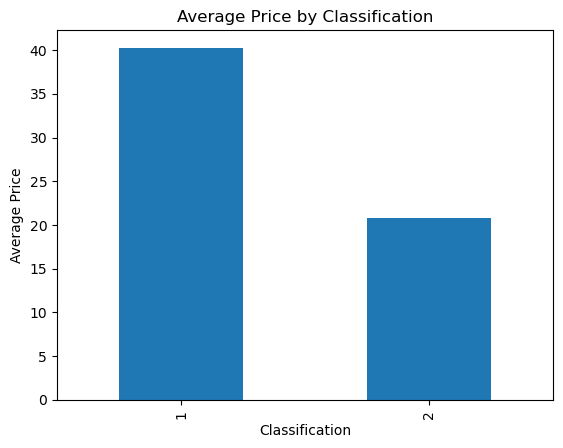

In [14]:
# Does product classification affect price?
purchase_price.groupby('Classification')['PurchasePrice'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Price by Classification")
plt.xlabel("Classification")
plt.ylabel("Average Price")
plt.show()

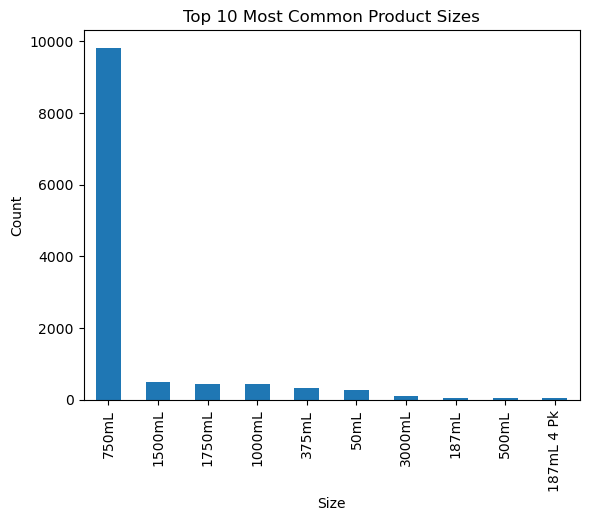

In [15]:
# What are the most common product sizes sold?
purchase_price['Size'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Common Product Sizes")
plt.xlabel("Size")
plt.ylabel("Count")
plt.show()

In [16]:
begInv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [17]:
begInv.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [18]:
begInv.dtypes

InventoryId     object
Store            int64
City            object
Brand            int64
Description     object
Size            object
onHand           int64
Price          float64
startDate       object
dtype: object

In [19]:
begInv['startDate'] = pd.to_datetime(begInv['startDate'])

In [20]:
begInv.dtypes

InventoryId            object
Store                   int64
City                   object
Brand                   int64
Description            object
Size                   object
onHand                  int64
Price                 float64
startDate      datetime64[ns]
dtype: object

In [21]:
begInv.shape

(206529, 9)

In [22]:
begInv.duplicated().sum()

np.int64(0)

EDA

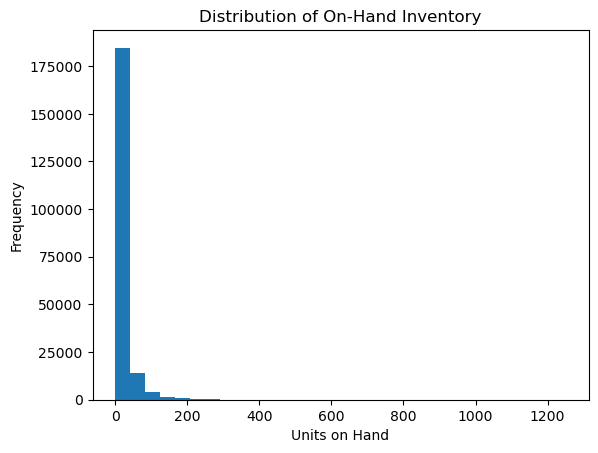

In [23]:
# How is the on-hand inventory distributed?
plt.hist(begInv['onHand'], bins=30)
plt.title("Distribution of On-Hand Inventory")
plt.xlabel("Units on Hand")
plt.ylabel("Frequency")
plt.show()

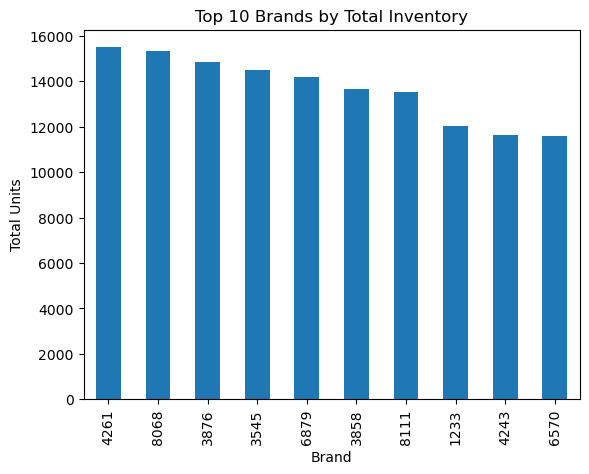

In [24]:
# Which brands have the highest total inventory?
begInv.groupby('Brand')['onHand'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Brands by Total Inventory")
plt.xlabel("Brand")
plt.ylabel("Total Units")
plt.show()

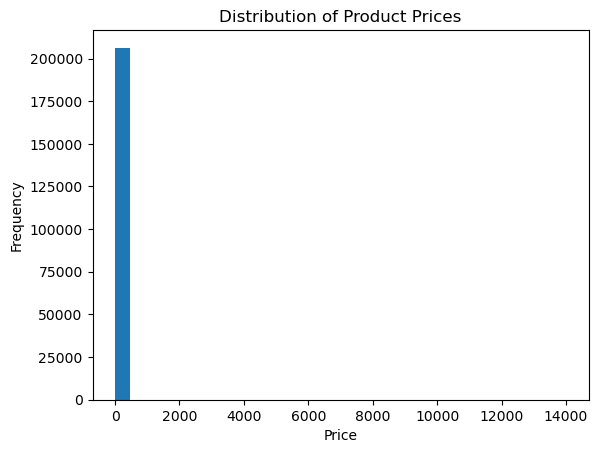

In [25]:
# What is the price distribution of products?
plt.hist(begInv['Price'], bins=30)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

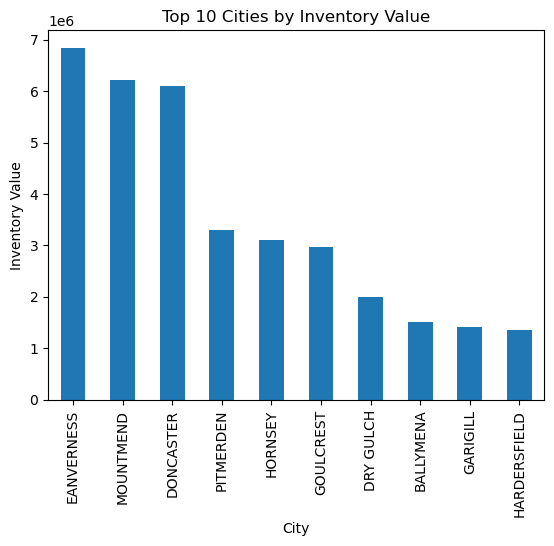

In [26]:
# Which cities have the highest inventory value?
begInv['InventoryValue'] = begInv['onHand'] * begInv['Price']
top_cities = begInv.groupby('City')['InventoryValue'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='bar')
plt.title("Top 10 Cities by Inventory Value")
plt.xlabel("City")
plt.ylabel("Inventory Value")
plt.show()


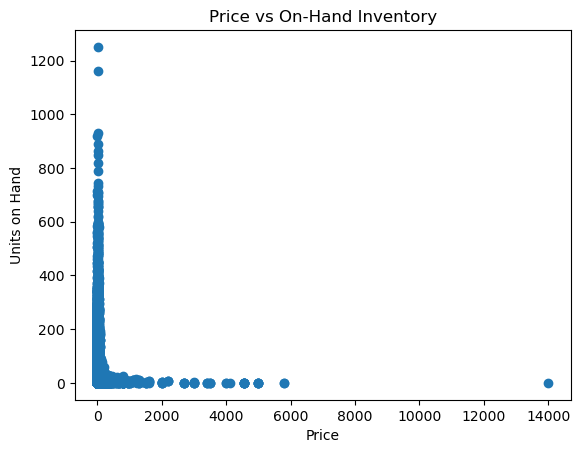

In [27]:
# Is there a relationship between price and stock quantity?
plt.scatter(begInv['Price'], begInv
            ['onHand'])
plt.title("Price vs On-Hand Inventory")
plt.xlabel("Price")
plt.ylabel("Units on Hand")
plt.show()

In [28]:
endInv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [29]:
endInv.isnull().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [30]:
endInv.shape

(224489, 9)

In [31]:
endInv.dropna(inplace=True)

In [32]:
endInv.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64

In [33]:
endInv.shape

(223205, 9)

In [34]:
endInv.dtypes

InventoryId     object
Store            int64
City            object
Brand            int64
Description     object
Size            object
onHand           int64
Price          float64
endDate         object
dtype: object

In [35]:
endInv['endDate'] = pd.to_datetime(endInv['endDate'])

In [36]:
endInv.dtypes

InventoryId            object
Store                   int64
City                   object
Brand                   int64
Description            object
Size                   object
onHand                  int64
Price                 float64
endDate        datetime64[ns]
dtype: object

In [37]:
endInv.duplicated().sum()

np.int64(0)

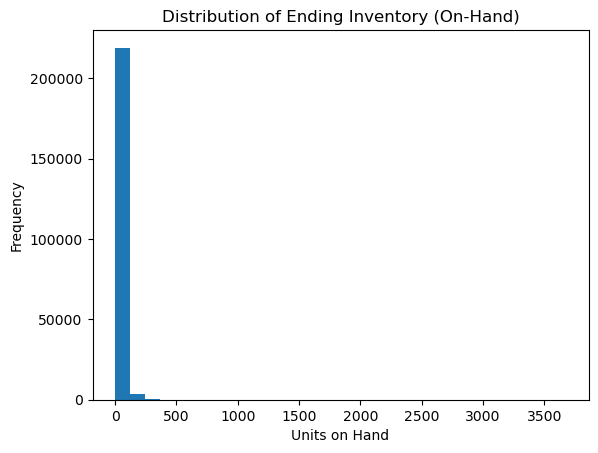

In [38]:
# How is the ending on-hand inventory distributed?
plt.hist(endInv['onHand'], bins=30)
plt.title("Distribution of Ending Inventory (On-Hand)")
plt.xlabel("Units on Hand")
plt.ylabel("Frequency")
plt.show()

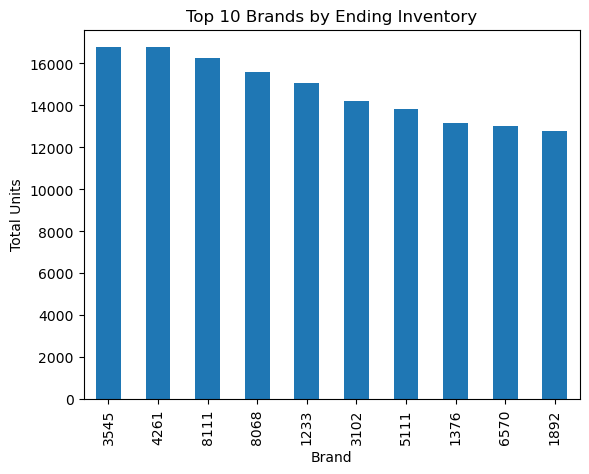

In [39]:
# Which brands have the highest ending inventory?
endInv.groupby('Brand')['onHand'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Brands by Ending Inventory")
plt.xlabel("Brand")
plt.ylabel("Total Units")
plt.show()

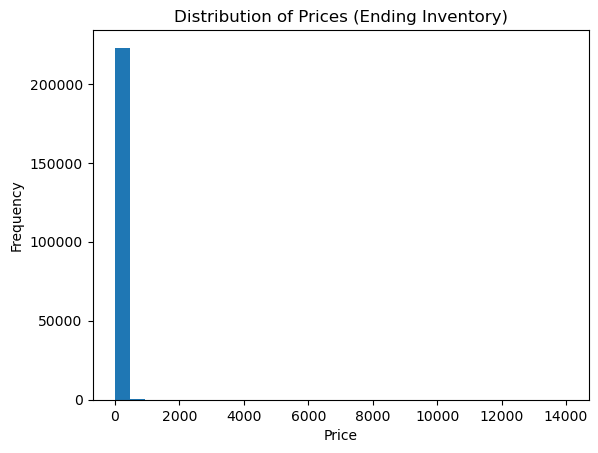

In [40]:
# What is the distribution of product prices in ending inventory?
plt.hist(endInv['Price'], bins=30)
plt.title("Distribution of Prices (Ending Inventory)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

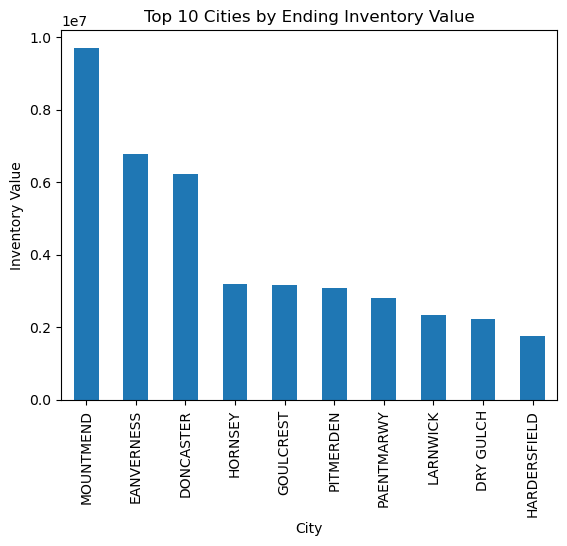

In [41]:
# Which cities hold the highest ending inventory value?
endInv['InventoryValue'] = endInv['onHand'] * endInv['Price']
top_cities = endInv.groupby('City')['InventoryValue'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='bar')
plt.title("Top 10 Cities by Ending Inventory Value")
plt.xlabel("City")
plt.ylabel("Inventory Value")
plt.show()


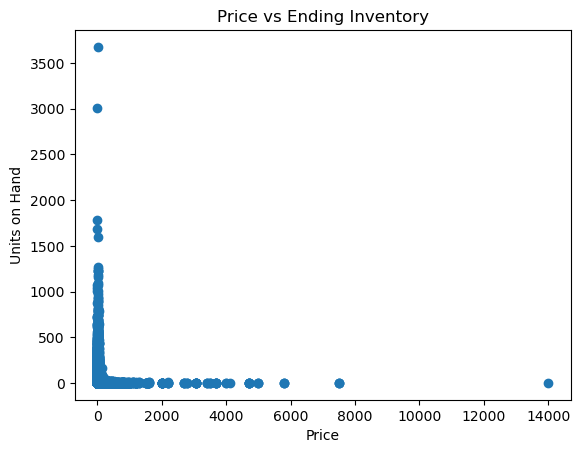

In [42]:
# Is there a relationship between price and remaining stock?
plt.scatter(endInv['Price'], endInv
            ['onHand'])
plt.title("Price vs Ending Inventory")
plt.xlabel("Price")
plt.ylabel("Units on Hand")
plt.show()


In [43]:
Invoice.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [44]:
Invoice.isnull().sum()

VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64

In [45]:
Invoice.dtypes

VendorNumber      int64
VendorName       object
InvoiceDate      object
PONumber          int64
PODate           object
PayDate          object
Quantity          int64
Dollars         float64
Freight         float64
Approval         object
dtype: object

In [46]:
Invoice['InvoiceDate'] = pd.to_datetime(Invoice['InvoiceDate'])
Invoice['PODate'] = pd.to_datetime(Invoice['PODate'])
Invoice['PayDate'] = pd.to_datetime(Invoice['PayDate'])

In [47]:
Invoice.dtypes

VendorNumber             int64
VendorName              object
InvoiceDate     datetime64[ns]
PONumber                 int64
PODate          datetime64[ns]
PayDate         datetime64[ns]
Quantity                 int64
Dollars                float64
Freight                float64
Approval                object
dtype: object

In [48]:
Invoice.duplicated().sum()

np.int64(0)

EDA

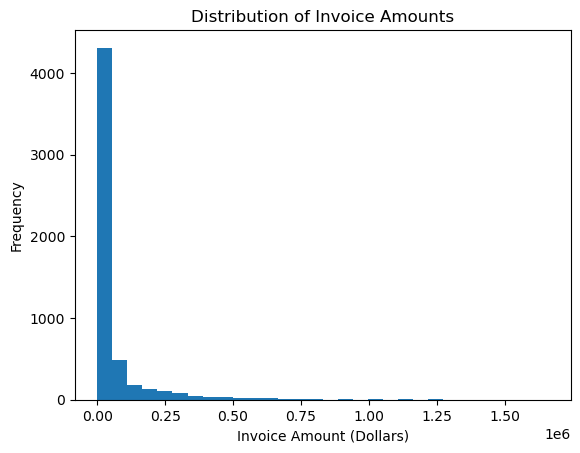

In [49]:
# How is total invoice spending distributed?
plt.hist(Invoice['Dollars'], bins = 30)
plt.title("Distribution of Invoice Amounts")
plt.xlabel("Invoice Amount (Dollars)")
plt.ylabel("Frequency")
plt.show()

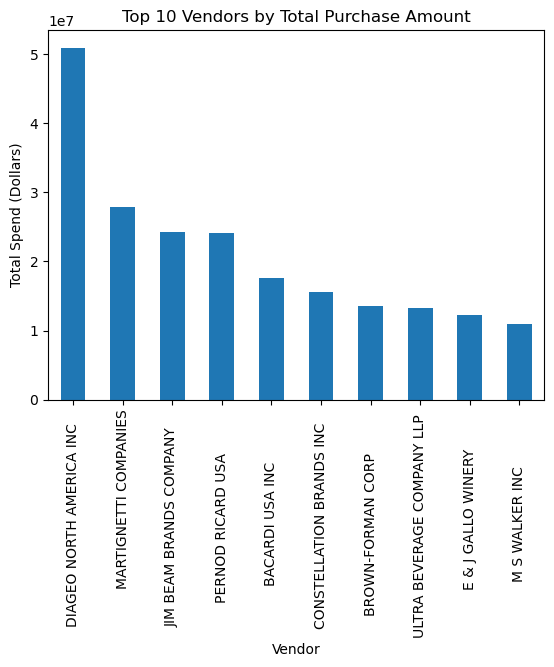

In [50]:
# Which vendors account for the highest purchase spending?
top_vendors = Invoice.groupby('VendorName')['Dollars'].sum().sort_values(ascending=False).head(10)
top_vendors.plot(kind='bar')
plt.title("Top 10 Vendors by Total Purchase Amount")
plt.xlabel("Vendor")
plt.ylabel("Total Spend (Dollars)")
plt.show()



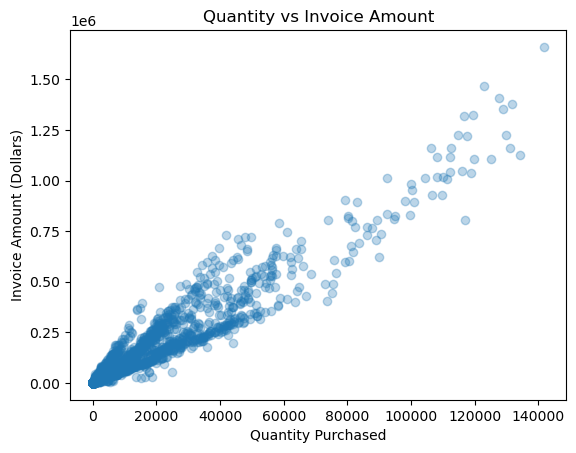

In [51]:
# relationship between quantity purchased and invoice amount
plt.scatter(Invoice['Quantity'], Invoice['Dollars'], alpha=0.3)
plt.title("Quantity vs Invoice Amount")
plt.xlabel("Quantity Purchased")
plt.ylabel("Invoice Amount (Dollars)")
plt.show()


In [52]:
final_purchase.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [53]:
final_purchase.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64

In [54]:
final_purchase.shape

(2372474, 16)

In [55]:
final_purchase.dropna(inplace=True)

In [56]:
final_purchase.dtypes

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object

In [57]:
final_purchase['PODate'] = pd.to_datetime(final_purchase['PODate'])
final_purchase['ReceivingDate'] = pd.to_datetime(final_purchase['ReceivingDate'])
final_purchase['InvoiceDate'] = pd.to_datetime(final_purchase['InvoiceDate'])
final_purchase['PayDate'] = pd.to_datetime(final_purchase['PayDate'])

In [58]:
final_purchase.dtypes

InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
VendorNumber               int64
VendorName                object
PONumber                   int64
PODate            datetime64[ns]
ReceivingDate     datetime64[ns]
InvoiceDate       datetime64[ns]
PayDate           datetime64[ns]
PurchasePrice            float64
Quantity                   int64
Dollars                  float64
Classification             int64
dtype: object

In [59]:
final_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2372471 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           int64         
 2   Brand           int64         
 3   Description     object        
 4   Size            object        
 5   VendorNumber    int64         
 6   VendorName      object        
 7   PONumber        int64         
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  int64         
dtypes: datetime64[ns](4), float64(2), int64(6), object(4)
memory usage: 307.7+ MB


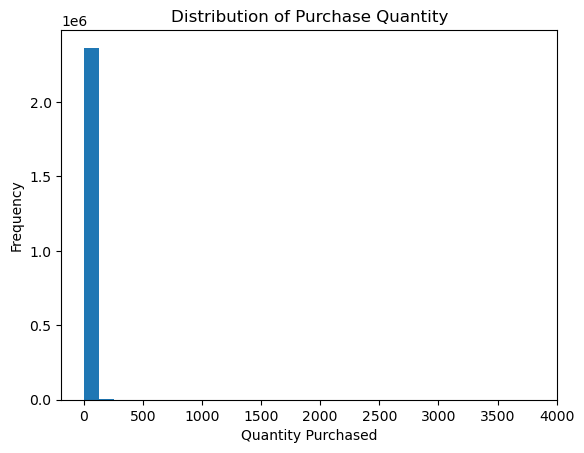

In [60]:
# How is the purchase quantity distributed?
plt.hist(final_purchase['Quantity'], bins = 30)
plt.title("Distribution of Purchase Quantity")
plt.xlabel("Quantity Purchased")
plt.ylabel("Frequency")
plt.show()

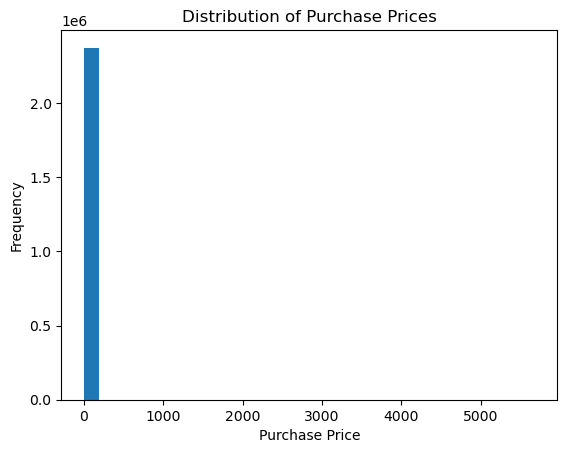

In [61]:
# What is the distribution of purchase prices?
plt.hist(final_purchase['PurchasePrice'], bins = 30)
plt.title("Distribution of Purchase Prices")
plt.xlabel("Purchase Price")
plt.ylabel("Frequency")
plt.show()

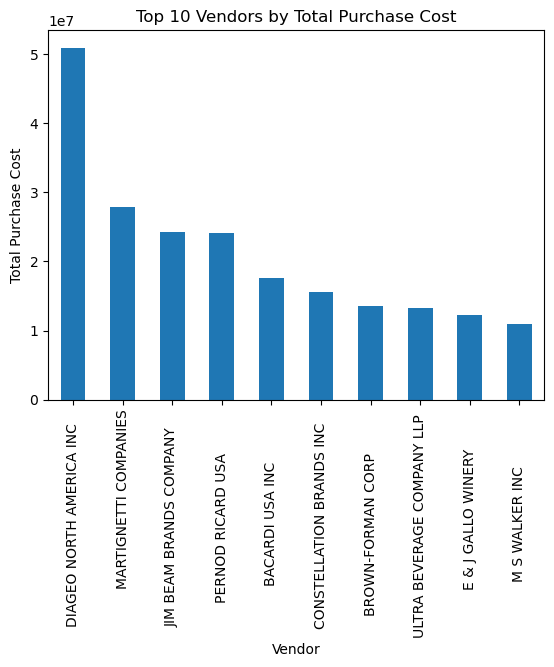

In [62]:
# Which vendors contribute the highest total purchase cost?
final_purchase['TotalCost'] = final_purchase['Quantity'] * final_purchase['PurchasePrice']
top_vendors = final_purchase.groupby('VendorName')['TotalCost'].sum().sort_values(ascending=False).head(10)
top_vendors.plot(kind='bar')
plt.title("Top 10 Vendors by Total Purchase Cost")
plt.xlabel("Vendor")
plt.ylabel("Total Purchase Cost")
plt.show()


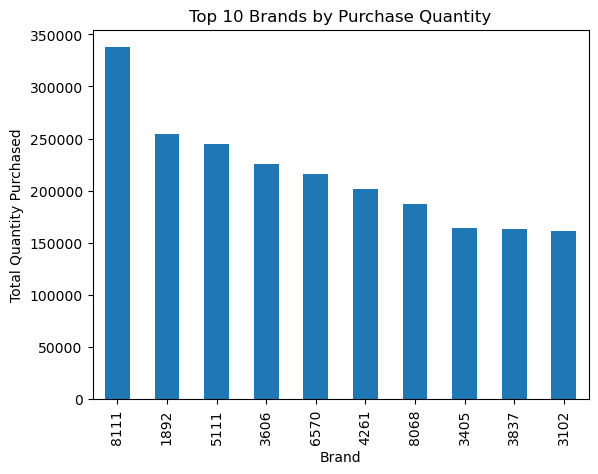

In [63]:
# Which brands are purchased the most (by quantity)?
top_brands = final_purchase.groupby('Brand')['Quantity'].sum().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar')
plt.title("Top 10 Brands by Purchase Quantity")
plt.xlabel("Brand")
plt.ylabel("Total Quantity Purchased")
plt.show()

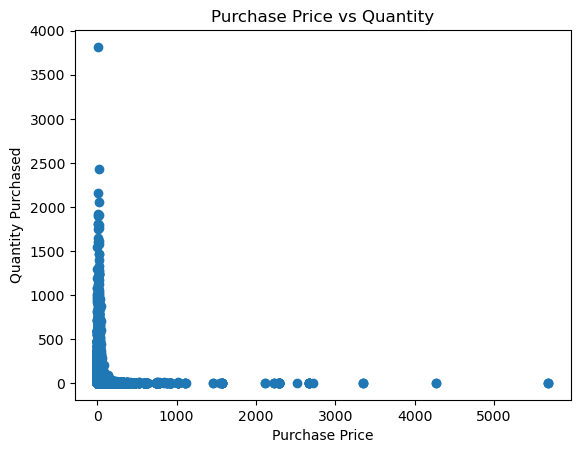

In [64]:
# Is there a relationship between purchase price and quantity?
plt.scatter(final_purchase['PurchasePrice'], final_purchase['Quantity'])
plt.title("Purchase Price vs Quantity")
plt.xlabel("Purchase Price")
plt.ylabel("Quantity Purchased")
plt.show()


In [65]:
final_sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [66]:
final_sales.shape

(1048575, 14)

In [67]:
final_sales.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [68]:
final_sales.duplicated().sum()

np.int64(0)

In [69]:
final_sales.dtypes

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
SalesQuantity       int64
SalesDollars      float64
SalesPrice        float64
SalesDate          object
Volume              int64
Classification      int64
ExciseTax         float64
VendorNo            int64
VendorName         object
dtype: object

In [70]:
final_sales['SalesDate'] = pd.to_datetime(final_sales['SalesDate'])

In [71]:
final_sales.dtypes

InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
SalesQuantity              int64
SalesDollars             float64
SalesPrice               float64
SalesDate         datetime64[ns]
Volume                     int64
Classification             int64
ExciseTax                float64
VendorNo                   int64
VendorName                object
dtype: object

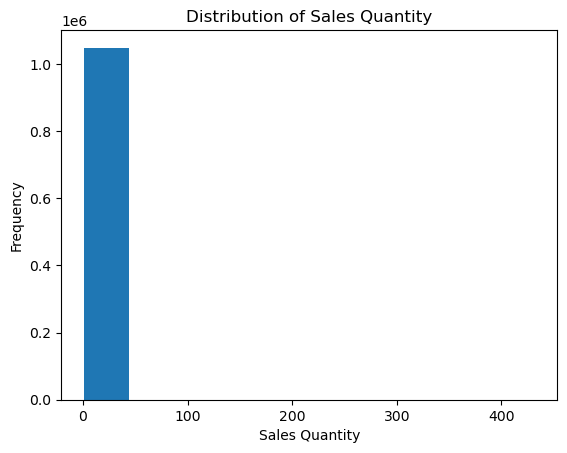

In [72]:
# How is sales quantity distributed?
plt.hist(final_sales['SalesQuantity'])
plt.title("Distribution of Sales Quantity")
plt.xlabel("Sales Quantity")
plt.ylabel("Frequency")
plt.show()

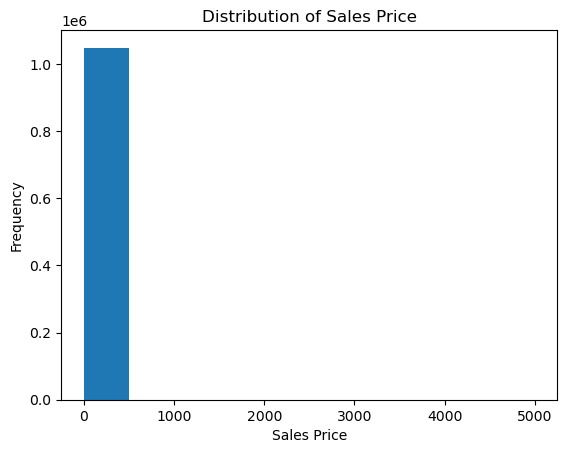

In [73]:
# What is the distribution of sales price?
plt.hist(final_sales['SalesPrice'])
plt.title("Distribution of Sales Price")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.show()

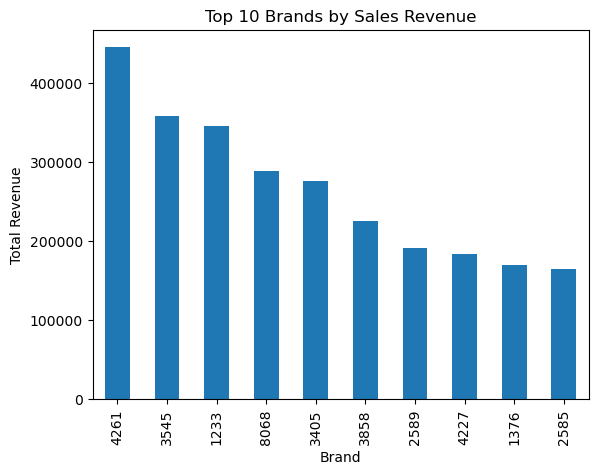

In [74]:
# Which brands generate the highest sales revenue?
final_sales['Revenue'] = final_sales['SalesQuantity'] * final_sales['SalesPrice']

top_brands = final_sales.groupby('Brand')['Revenue'].sum().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar')
plt.title("Top 10 Brands by Sales Revenue")
plt.xlabel("Brand")
plt.ylabel("Total Revenue")
plt.show()


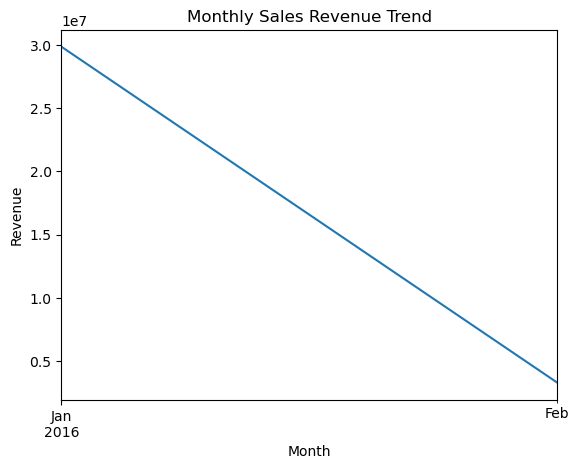

In [75]:
# How do sales vary over time?
daily_sales = final_sales.groupby(final_sales['SalesDate'].dt.to_period('M'))['Revenue'].sum()
daily_sales.plot()
plt.title("Monthly Sales Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


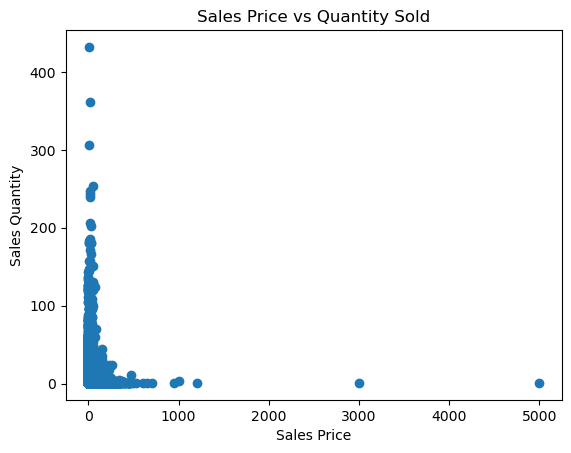

In [76]:
# Is there a relationship between price and quantity sold?
plt.scatter(final_sales['SalesPrice'], final_sales['SalesQuantity'])
plt.title("Sales Price vs Quantity Sold")
plt.xlabel("Sales Price")
plt.ylabel("Sales Quantity")
plt.show()

In [77]:
# Rename columns to avoid confusion
begInv = begInv.rename(columns={"onHand" : "begOnHand"})
endInv = endInv.rename(columns={"onHand" : "endOnHand"})

In [78]:
# Merge Beginning & Ending Inventory
inv = begInv.merge(endInv[['InventoryId' , 'endOnHand']], on='InventoryId', how='left')

In [79]:
# Merge Purchases
inv = inv.merge(final_purchase.groupby('InventoryId')['Quantity'].sum().reset_index(), on='InventoryId', how='left')

In [80]:
inv = inv.rename(columns={"Quantity" : "PurchasedQty"})

In [81]:
# Merge Sales
inv = inv.merge(final_sales.groupby('InventoryId')['SalesQuantity'].sum().reset_index(), on='InventoryId', how='left')

In [82]:
# Merge Purchase Prices
inv = inv.merge(purchase_price[['Brand','PurchasePrice']],on='Brand', how='left')

In [83]:
# Fill missing values
inv[['PurchasedQty', 'SalesQuantity', 'endOnHand']] = inv[['PurchasedQty', 'SalesQuantity', 'endOnHand']].fillna(0)

EDA Questions on MERGED DATA

In [84]:
inv.head(2)

,InventoryId,Store,City,Brand,Description,Size,begOnHand,Price,startDate,InventoryValue,endOnHand,PurchasedQty,SalesQuantity,PurchasePrice
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01,103.92,11.0,105.0,11.0,9.28
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01,76.93,0.0,36.0,7.0,7.40


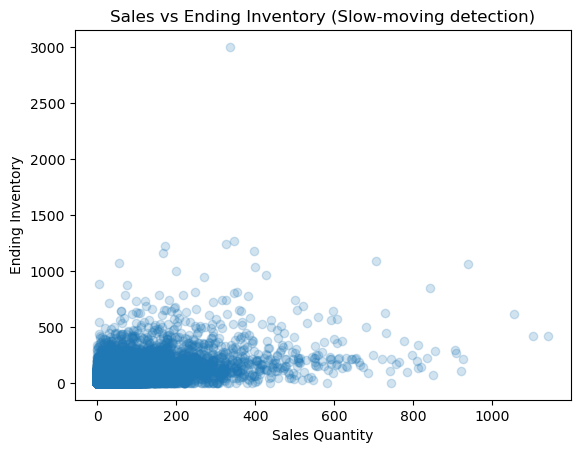

In [85]:
# Which products are slow-moving or dead stock?
plt.scatter(inv['SalesQuantity'], inv['endOnHand'], alpha=0.2)
plt.title("Sales vs Ending Inventory (Slow-moving detection)")
plt.xlabel("Sales Quantity")
plt.ylabel("Ending Inventory")
plt.show()
# High EndOnHand & low SalesQuantity → Dead stock

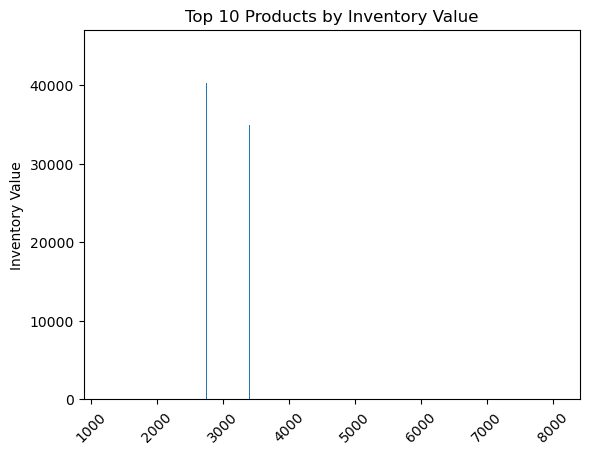

In [86]:
# How much inventory value is tied up?
inv['InventoryValue'] = inv['endOnHand'] * inv['Price']
top_value = inv.sort_values('InventoryValue', ascending=False).head(10)
plt.bar(top_value['Brand'], top_value['InventoryValue'])
plt.title("Top 10 Products by Inventory Value")
plt.xticks(rotation=45)
plt.ylabel("Inventory Value")
plt.show()
# Few products lock major capital
# Focus area for optimization

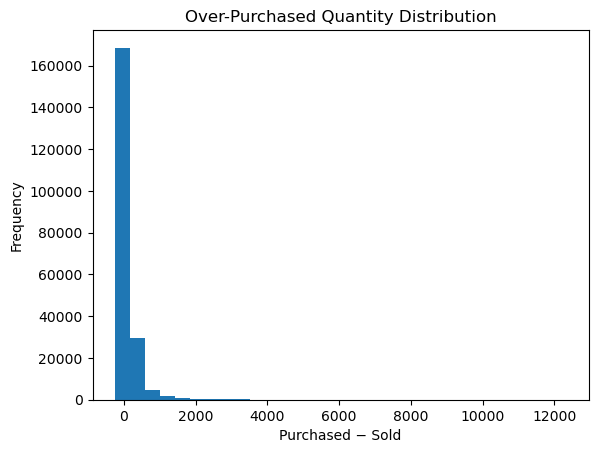

In [87]:
# Are we over-purchasing compared to sales?
inv['OverPurchased'] = inv['PurchasedQty'] - inv['SalesQuantity']
plt.hist(inv['OverPurchased'], bins=30)
plt.title("Over-Purchased Quantity Distribution")
plt.xlabel("Purchased − Sold")
plt.ylabel("Frequency")
plt.show()


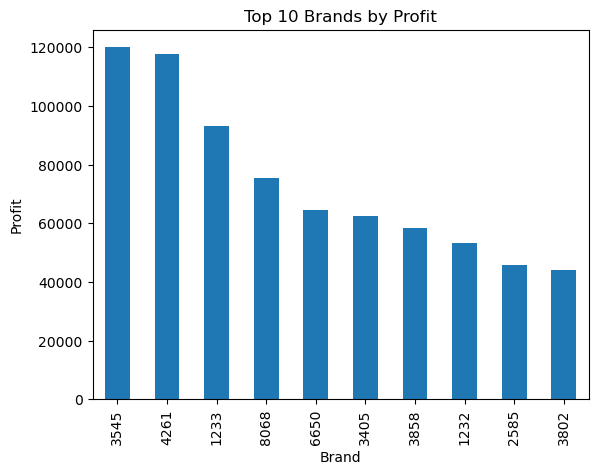

In [88]:
# Which brands are most profitable?
inv['Revenue'] = inv['SalesQuantity'] * inv['Price']
inv['Cost'] = inv['SalesQuantity'] * inv['PurchasePrice']
inv['Profit'] = inv['Revenue'] - inv['Cost']

top_profit = inv.groupby('Brand')['Profit'].sum().sort_values(ascending=False).head(10)

top_profit.plot(kind='bar')
plt.title("Top 10 Brands by Profit")
plt.ylabel("Profit")
plt.show()


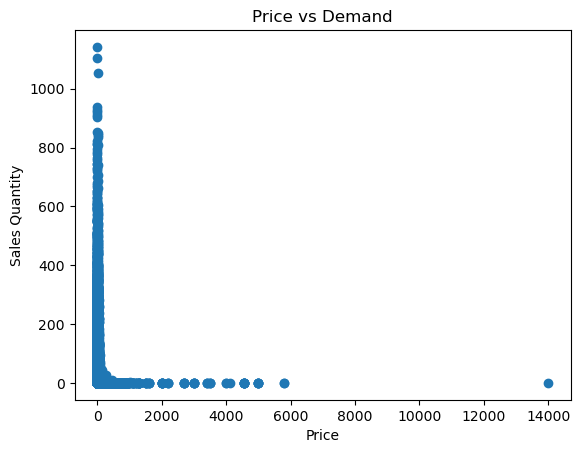

In [89]:
# Is pricing aligned with demand?
plt.figure()
plt.scatter(inv['Price'], inv['SalesQuantity'])
plt.title("Price vs Demand")
plt.xlabel("Price")
plt.ylabel("Sales Quantity")
plt.show()

# High price + low sales → overpriced
# High price + high sales → premium products

In [90]:
inv.corr(numeric_only=True)

,Store,Brand,begOnHand,Price,InventoryValue,endOnHand,PurchasedQty,SalesQuantity,PurchasePrice,OverPurchased,Revenue,Cost,Profit
Store,1.000000,0.039331,0.077987,0.030347,0.067354,0.057641,0.041715,-0.026315,0.027836,0.047252,-0.004874,-0.006366,-0.001069
Brand,0.039331,1.000000,-0.033851,-0.042091,-0.065791,-0.041401,-0.072602,-0.062562,-0.054568,-0.072306,-0.073509,-0.090041,-0.030606
begOnHand,0.077987,-0.033851,1.000000,-0.056660,0.426377,0.632542,0.588008,0.566192,-0.053990,0.580158,0.484611,0.481947,0.472962
Price,0.030347,-0.042091,-0.056660,1.000000,0.158792,-0.046646,-0.049388,-0.051105,0.998153,-0.048404,0.011939,0.014224,0.005943
InventoryValue,0.067354,-0.065791,0.426377,0.158792,1.000000,0.690757,0.430223,0.285338,0.154038,0.436297,0.577076,0.582220,0.543007
endOnHand,0.057641,-0.041401,0.632542,-0.046646,0.690757,1.000000,0.699476,0.538583,-0.044115,0.702506,0.471959,0.470377,0.458155
PurchasedQty,0.041715,-0.072602,0.588008,-0.049388,0.430223,0.699476,1.000000,0.831408,-0.046032,0.998702,0.570761,0.569523,0.552430
SalesQuantity,-0.026315,-0.062562,0.566192,-0.051105,0.285338,0.538583,0.831408,1.000000,-0.048088,0.802029,0.645701,0.635446,0.646469
PurchasePrice,0.027836,-0.054568,-0.053990,0.998153,0.154038,-0.044115,-0.046032,-0.048088,1.000000,-0.045072,0.012693,0.015859,0.004528
OverPurchased,0.047252,-0.072306,0.580158,-0.048404,0.436297,0.702506,0.998702,0.802029,-0.045072,1.000000,0.554333,0.553942,0.534558


In [91]:
# redict future SalesQuantity based on:
# Price
# Purchase price
# Inventory
# Past purchases

In [92]:
# Target Variable (y)
y = inv['SalesQuantity']

In [93]:
# Feature Selection (X)
features = ['Price' , 'PurchasePrice' , 'endOnHand' , 'begOnHand','PurchasedQty']
x = inv[features]

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.2, random_state = 42)

In [95]:
# 5. Lets make pipline

# For numerical columns
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler" , StandardScaler())
]) 

In [96]:
x_train_prepeaed = num_pipeline.fit_transform(x_train)
x_test_prepeaed = num_pipeline.transform(x_test)

In [97]:
lr = LinearRegression()
lr.fit(x_train_prepeaed, y_train)
lr_pred = lr.predict(x_test_prepeaed)
mae = mean_absolute_error(y_test, lr_pred)
rmse = root_mean_squared_error(y_test, lr_pred)
r2 = r2_score(y_test,lr_pred)
lr_rmses = -cross_val_score(lr, x_train_prepeaed, y_train, scoring="neg_root_mean_squared_error", cv = 10)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print(pd.Series(lr_rmses).describe())

MAE: 6.2916129078162015
RMSE: 16.157728329515546
R2: 0.6987962510187156
count    10.000000
mean     15.784307
std       0.695126
min      14.873306
25%      15.479780
50%      15.512686
75%      15.894999
max      17.247077
dtype: float64


In [98]:
dt = DecisionTreeRegressor()
dt.fit(x_train_prepeaed, y_train)
dt_pred = dt.predict(x_test_prepeaed)
mae = mean_absolute_error(y_test, dt_pred)
rmse = root_mean_squared_error(y_test, dt_pred)
r2 = r2_score(dt_pred, y_test)
dt_rmses = -cross_val_score(dt, x_train_prepeaed, y_train, scoring="neg_root_mean_squared_error", cv = 10)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print(pd.Series(dt_rmses).describe())

MAE: 8.35715314007977
RMSE: 21.51746209779248
R2: 0.48796134877450625
count    10.000000
mean     20.891817
std       0.567786
min      20.267195
25%      20.404237
50%      20.867778
75%      21.265968
max      21.879981
dtype: float64


In [99]:
rf = RandomForestRegressor()
rf.fit(x_train_prepeaed, y_train)
rf_pred  = rf.predict(x_test_prepeaed)
mae = mean_absolute_error(y_test, rf_pred)
rmse = root_mean_squared_error(y_test, rf_pred)
r2 = r2_score(rf_pred, y_test)
rf_rmses = -cross_val_score(rf, x_train_prepeaed, y_train, scoring="neg_root_mean_squared_error", cv = 10)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print(pd.Series(rf_rmses).describe())

MAE: 6.163323713182327
RMSE: 15.301278469764032
R2: 0.6655935543787965
count    10.000000
mean     15.165931
std       0.398688
min      14.619368
25%      14.926170
50%      15.162248
75%      15.254540
max      15.841523
dtype: float64


In [ ]:
# “I trained Linear Regression, Decision Tree, and Random Forest models.
# Random Forest performed best with the lowest RMSE and MAE, and also showed stable cross-validation results, indicating good generalization.
# Therefore, I selected Random Forest as the final model for sales quantity prediction.”

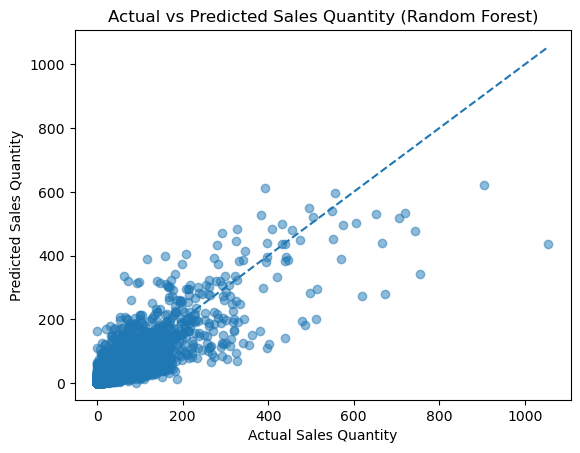

In [101]:
# Actual vs Predicted Values
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Sales Quantity")
plt.ylabel("Predicted Sales Quantity")
plt.title("Actual vs Predicted Sales Quantity (Random Forest)")
plt.show()

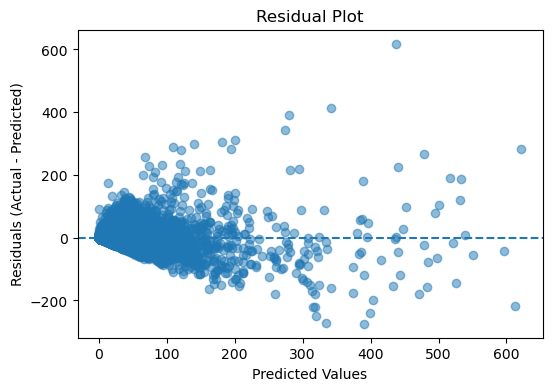

In [102]:
# Residual Plot (Error Analysis)
residuals = y_test - rf_pred

plt.figure(figsize=(6,4))
plt.scatter(rf_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()
